In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from random import randint

In [3]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [4]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->
  x = np.array(x)
  bootstrap_array = np.random.choice(x, size = (n_bootstraps,sample_size),replace = True)
  data_mean = bootstrap_array.mean()
  mean_array = []
  for i in range(bootstrap_array.shape[0]):
    mean_array.append(bootstrap_array[i].mean())
  mean_array.sort()
  lower = np.percentile(mean_array,2.5)
  upper = np.percentile(mean_array,97.5)
  return data_mean, lower, upper

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

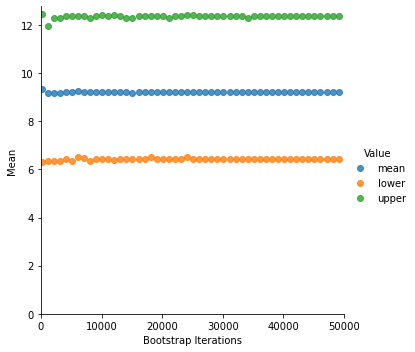

In [5]:
# Call your bootstrap function and plot the results

boots = []
print(data)
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

In [6]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  ci_low=(100-ci)/2
  ci_hi=ci+ci_low
  # print(ci_low,ci_hi)
  arr=[]
  # print(np.random.choice(x,sample_size))
  for i in range(0,n_bootstraps):
    arr.append(np.mean(np.random.choice(sample,sample_size)))
  data_mean=np.mean(arr)
  lower=np.percentile(arr,ci_low)
  upper=np.percentile(arr,ci_hi)
  return data_mean, lower, upper

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 50000.0)

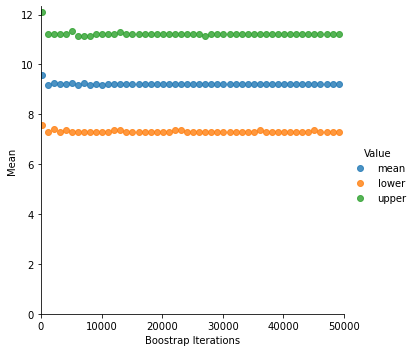

In [7]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

Vehicles Data Set

In [8]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->
Vehicle_df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
print(Vehicle_df.head(10))
print('\n')
print('Statiscal Information')
print(Vehicle_df.describe())
# Note: you can add more cells as needed to organise your code and your plots

   Current fleet  New Fleet
0             18       24.0
1             15       27.0
2             18       27.0
3             16       25.0
4             17       31.0
5             15       35.0
6             14       24.0
7             14       19.0
8             14       28.0
9             15       23.0


Statiscal Information
       Current fleet  New Fleet
count     249.000000  79.000000
mean       20.144578  30.481013
std         6.414699   6.107710
min         9.000000  18.000000
25%        15.000000  25.500000
50%        19.000000  32.000000
75%        24.000000  34.000000
max        39.000000  47.000000


In [9]:
Vehicle_df.isnull().sum()

Current fleet      0
New Fleet        170
dtype: int64

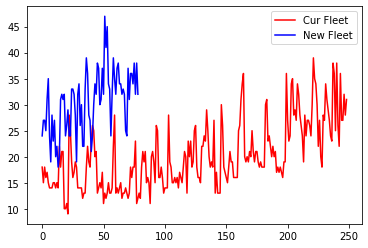

In [10]:
plt.plot(Vehicle_df['Current fleet'],color = 'r',label = 'Cur Fleet')
plt.plot(Vehicle_df['New Fleet'],color = 'b',label = 'New Fleet')
plt.legend()

<AxesSubplot:xlabel='Current fleet', ylabel='Count'>

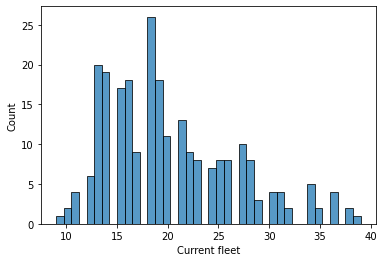

In [11]:
sns.histplot(Vehicle_df['Current fleet'], bins = 40)

<AxesSubplot:xlabel='New Fleet', ylabel='Count'>

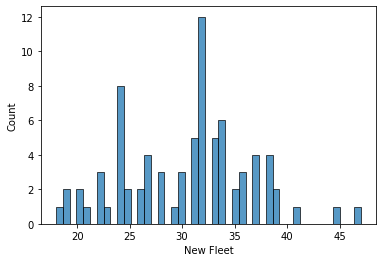

In [12]:
sns.histplot(Vehicle_df['New Fleet'], bins = 45)

Compare the two fleets
The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.

Calculate the mean of both samples.
Using the bootstrap function that you created:
Construct the 95% CI of the mean of the current fleet.
Construct the 95% CI of the mean of the new fleet.
Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [13]:
# <---INSERT YOUR CODE HERE--->
Cur_fl_mean = Vehicle_df['Current fleet'].mean()
New_fl_mean = Vehicle_df['New Fleet'].mean()
print('Current Fleet mean ', Cur_fl_mean)
print('New Fleet mean ', New_fl_mean)

Current Fleet mean  20.14457831325301
New Fleet mean  30.481012658227847


In [14]:
def permutation(Concat_array):
  np.random.shuffle(Concat_array)
  return Concat_array

In [15]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
  count = 0
  sample1 = np.array(sample1)
  #print(len(sample1))
  sample2 = np.array(sample2)
  #print(len(sample2))
  s1_l = len(sample1)
  s1_mean = sample1.mean()
  s2_mean = sample2.mean()
  tobs = s2_mean - s1_mean
  #print("Intial mean value :",tobs)
  for i in range(n_permutations):
    concat  = np.concatenate((sample1,sample2))
    concat = permutation(concat)
    new_s1 = concat[:s1_l]
    new_s2 = concat[s1_l:]
    #print(len(new_s1))
    new_s1_mean = new_s1.mean()
    new_s2_mean = new_s2.mean()
    tperm = new_s2_mean - new_s1_mean
    #print(tperm)
    if tperm > tobs :
      count += 1
  pvalue = count/n_permutations
  print("Permutation value is ", pvalue)
  return pvalue

In [16]:
old_flt = Vehicle_df['Current fleet'].dropna()
new_flt = Vehicle_df['New Fleet'].dropna().astype("int64")
print(old_flt)
print(new_flt)

0      18
1      15
2      18
3      16
4      17
       ..
244    27
245    27
246    32
247    28
248    31
Name: Current fleet, Length: 249, dtype: int64
0     24
1     27
2     27
3     25
4     31
      ..
74    34
75    38
76    32
77    38
78    32
Name: New Fleet, Length: 79, dtype: int64


In [17]:
permut_test(old_flt,new_flt,30000)

Permutation value is  0.0


0.0

In [18]:
np.array(Vehicle_df['Current fleet'])

array([18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 22, 18, 21,
       21, 10, 10, 11,  9, 28, 25, 19, 16, 17, 19, 18, 14, 14, 14, 14, 12,
       13, 13, 18, 22, 19, 18, 23, 26, 25, 20, 21, 13, 14, 15, 14, 17, 11,
       13, 12, 13, 15, 13, 13, 14, 22, 28, 13, 14, 13, 14, 15, 12, 13, 13,
       14, 13, 12, 13, 18, 16, 18, 18, 23, 11, 12, 13, 12, 18, 21, 19, 21,
       15, 16, 15, 11, 20, 21, 19, 15, 26, 25, 16, 16, 18, 16, 13, 14, 14,
       14, 28, 19, 18, 15, 15, 16, 15, 16, 14, 17, 16, 15, 18, 21, 20, 13,
       23, 20, 23, 18, 19, 25, 26, 18, 16, 16, 15, 22, 22, 24, 23, 29, 25,
       20, 18, 19, 18, 27, 13, 17, 13, 13, 13, 30, 26, 18, 17, 16, 15, 18,
       21, 19, 19, 16, 16, 16, 16, 25, 26, 31, 34, 36, 20, 19, 20, 19, 21,
       20, 25, 21, 19, 21, 21, 19, 18, 19, 18, 18, 18, 30, 31, 23, 24, 22,
       20, 22, 20, 21, 17, 18, 17, 18, 17, 16, 19, 19, 36, 27, 23, 24, 34,
       35, 28, 29, 27, 34, 32, 28, 26, 24, 19, 28, 24, 27, 27, 26, 24, 30,
       39, 35, 34, 30, 22

In [19]:
bootstrap_mean_ci(old_flt,len(old_flt),10000,80)

(20.13856345381526, 19.6144578313253, 20.65863453815261)

In [20]:
# Load the voting data
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

In [21]:
print(len(dem_share_PA))

print(len(dem_share_OH))

67
88


In [22]:
pa = pd.DataFrame(dem_share_PA)
oh = pd.DataFrame(dem_share_OH)

In [23]:
pa.mean()

0    45.476418
dtype: float64

In [24]:
oh.mean()

0    44.318182
dtype: float64

In [42]:
bootstrap_mean_ci(dem_share_OH,len(dem_share_OH),100000,98)

(44.32034323522727, 41.85862386363636, 46.754886363636366)

In [26]:
bootstrap_mean_ci(dem_share_PA,len(dem_share_PA),20000,95)

(45.47392296268657, 43.18088805970149, 47.81826492537313)

In [27]:
permut_test(dem_share_OH,dem_share_PA,10000)

Permutation value is  0.2366


0.2366

In [28]:
 def bootstrap_mean_ci_sd(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->
  ci_low=(100-ci)/2
  ci_hi=ci+ci_low
  # print(ci_low,ci_hi)
  arr=[]
  # print(np.random.choice(x,sample_size))
  for i in range(0,n_bootstraps):
    arr.append(np.std(np.random.choice(sample,sample_size)))
  data_mean=np.std(arr)
  lower=np.percentile(arr,ci_low)
  upper=np.percentile(arr,ci_hi)
  return data_mean, lower, upper

In [29]:
bootstrap_mean_ci_sd(old_flt, len(old_flt), 10000, 80)

(0.2927305703459978, 6.005523443618935, 6.759355417705405)

In [30]:
bootstrap_mean_ci(new_flt, len(new_flt), 10000, 80)

(30.49132151898734, 29.60759493670886, 31.379746835443036)

In [31]:
bootstrap_mean_ci_sd(old_flt,len(old_flt),10000,99)

(0.28904995413520057, 5.638764774408094, 7.1261999524066315)

In [32]:
bootstrap_mean_ci_sd(new_flt,len(new_flt),10000,99)

(0.4490233353219797, 4.876222273060631, 7.159180114622842)

In [39]:
bootstrap_mean_ci(data, data.shape[0], 10000, 90)

(9.216535714285714, 6.857142857142857, 11.857142857142858)

In [41]:
bootstrap_mean_ci_sd(data, data.shape[0],10000,95)

(1.1987219700585177, 2.7217941261796645, 7.352677211163344)